# Exploratory Data Analysis

<a href="https://github.com/JoeGanser/teaching/blob/main/Lectures/Exploring_Data/lecture_EDA1.ipynb">Notebook github link</a>

### Load our data: Housing data set, with house prices

In [2]:
import pandas as pd
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)
X = pd.DataFrame(housing.data, columns=housing.feature_names)
X.drop('Id',axis=1,inplace=True)
y = housing.target
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal
1,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,FR2,...,0.0,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal
2,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,Inside,...,0.0,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal
3,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,Corner,...,0.0,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml
4,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,FR2,...,0.0,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal


# Example 1:

* Demonstrate size of the data set (rows, columns)
* Identify the numerical columns
* Identify the categorical columns
* Identify the number of unique categories in the feature `SaleCondition`
    * Put these into dummy columns

In [3]:
print(X.shape)

(1460, 79)


In [4]:
numerical_columns = [j for j in X.columns if X[j].dtype in [float,int]]
X[numerical_columns].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


In [3]:
categorical_columns = [j for j in X.columns if j not in numerical_columns]
X[categorical_columns].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [5]:
print(X['SaleCondition'].describe(),'\n')
print(X['SaleCondition'].unique())
X['SaleCondition'].head()

count       1460
unique         6
top       Normal
freq        1198
Name: SaleCondition, dtype: object 

['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


0     Normal
1     Normal
2     Normal
3    Abnorml
4     Normal
Name: SaleCondition, dtype: object

In [50]:
pd.get_dummies(X['SaleCondition'])

,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
1455,0,0,0,0,1,0
1456,0,0,0,0,1,0
1457,0,0,0,0,1,0
1458,0,0,0,0,1,0


# Example 2: Make a histogram of the house prices.
* Include a vertical bars indicating the mean price
* Include vertical bars indicating the mean minus and plus 1 standard deviation

It should look like this;
![example2.png](example2.png)

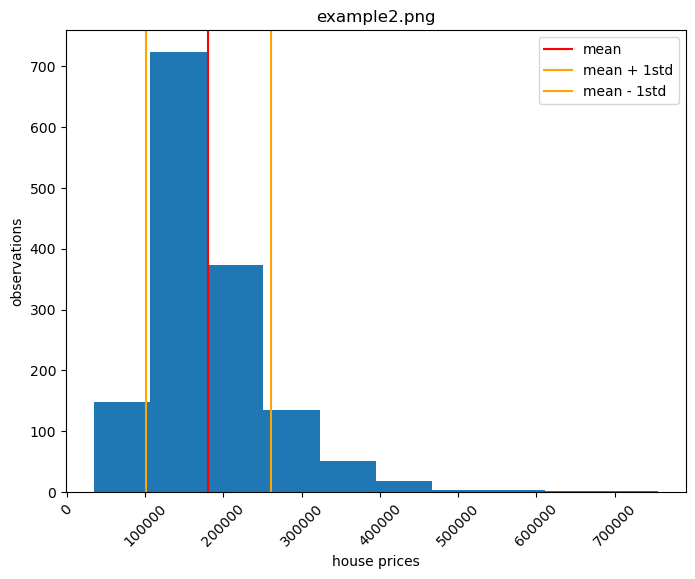

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.hist(y)
plt.xticks(rotation=45)
plt.title('example2.png')
plt.xlabel('house prices')
plt.ylabel('observations')
plt.axvline(y.mean(),c='red',label='mean')
plt.axvline(y.mean()+y.std(),c='orange',label='mean + 1std')
plt.axvline(y.mean()-y.std(),c='orange',label='mean - 1std')
plt.legend()
plt.savefig('example2.png')
plt.show()

# Example 3: Loop through the following categorical features to make these beeswam plots of categorical features versus price.

`categorical_features = ['Exterior1st','Exterior2nd','ExterQual','ExterCond']`

![example3.png](example3.png)

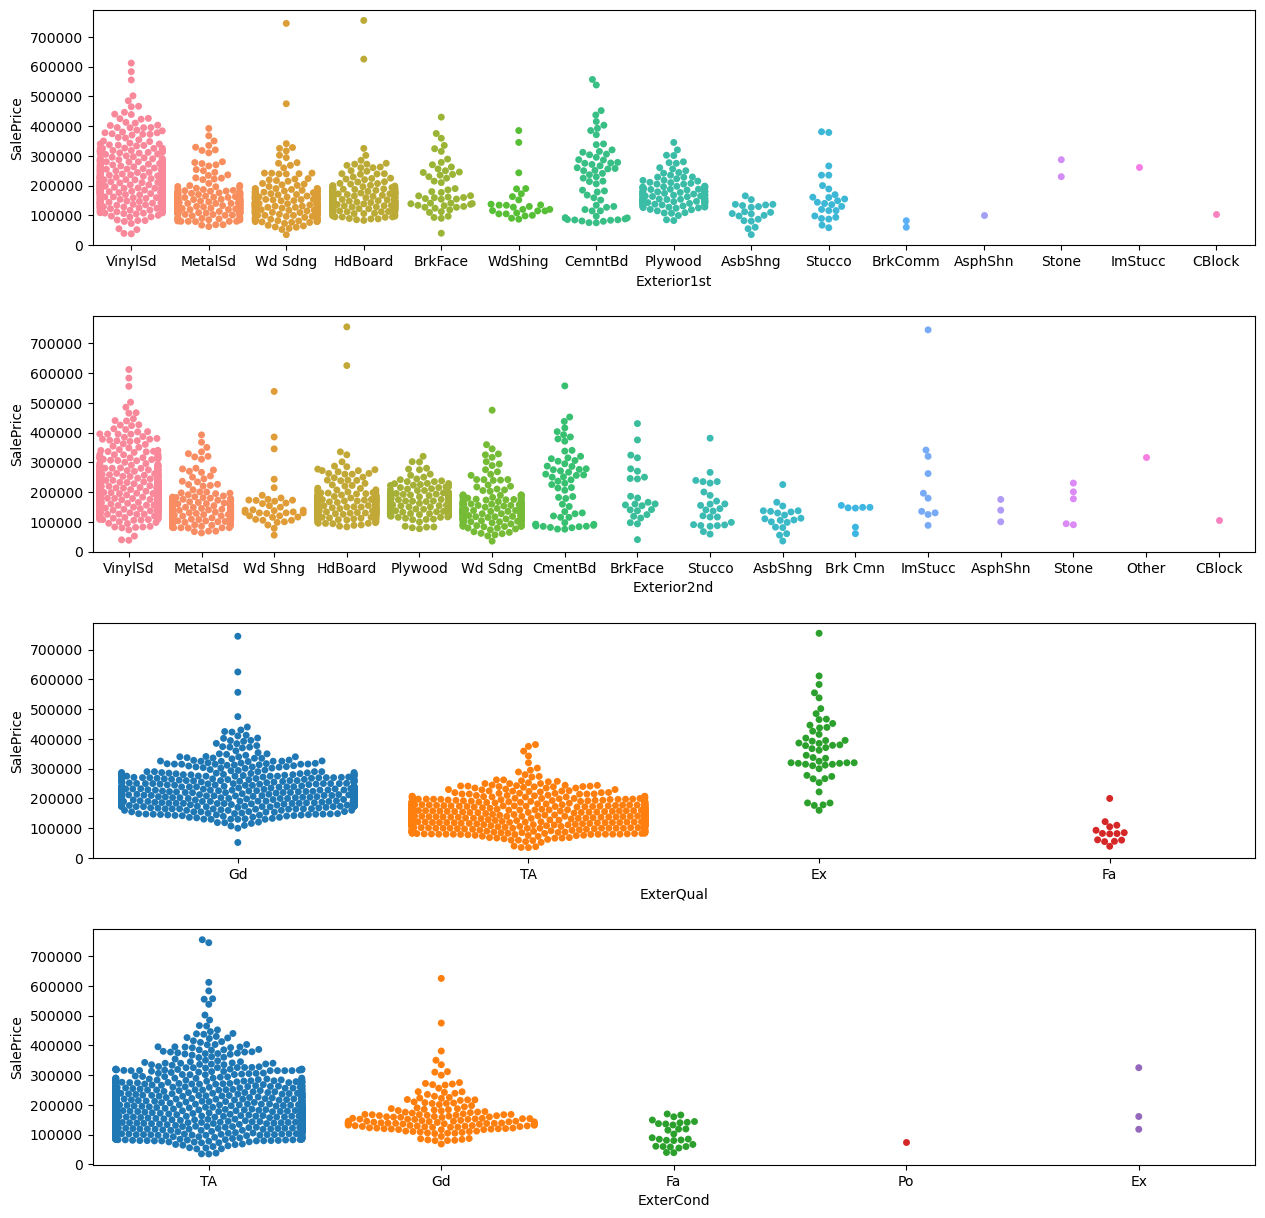

In [7]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
n=1
categorical_features = ['Exterior1st','Exterior2nd','ExterQual','ExterCond']
plt.subplots(figsize=(15,15))
for col in categorical_features:
    plt.subplot(len(categorical_features),1,n)
    plt.ylabel('SalePrice')
    sns.swarmplot(x=col,y='SalePrice',data=pd.concat([X,y],axis=1))
    n=n+1
plt.subplots_adjust(hspace=0.3)
plt.savefig('example3.png')
plt.show()

# Example 4: Find the pearson correlation coefficient for all the numerical features, as compared to the target variable `SalePrice`. Sort them in a dataframe

In [8]:
from scipy.stats import pearsonr
numerical_columns = [j for j in X.columns if X[j].dtype in [float,int]]
coefs = {}
for col in numerical_columns:
    _ = pd.concat([X[col],y],axis=1).dropna()
    pearson_coef = round(pearsonr(_[col],_['SalePrice'])[0],3)
    coefs[col] = [pearson_coef]
coefficients = pd.DataFrame(coefs).transpose().sort_values(by=0,ascending=False)
coefficients.columns = ['Pearson correlation coefficient']
coefficients

,Pearson correlation coefficient
OverallQual,0.791
GrLivArea,0.709
GarageCars,0.640
GarageArea,0.623
TotalBsmtSF,0.614
1stFlrSF,0.606
FullBath,0.561
TotRmsAbvGrd,0.534
YearBuilt,0.523
YearRemodAdd,0.507


# Example 4 continued: 
Join the previous data frame with the mutual information between the target `SalePrice` and the associated numerical feature.

In [10]:
import numpy as np
from sklearn.feature_selection import mutual_info_regression
mir = mutual_info_regression(X[numerical_columns].fillna(X[numerical_columns].mean()),y)
mir = pd.DataFrame(mir)
mir.index = numerical_columns
coefficients['mutual_information'] = mir.apply(lambda x: round(x,3))
coefficients

,Pearson correlation coefficient,mutual_information
OverallQual,0.791,0.563
GrLivArea,0.709,0.483
GarageCars,0.640,0.357
GarageArea,0.623,0.366
TotalBsmtSF,0.614,0.366
1stFlrSF,0.606,0.309
FullBath,0.561,0.258
TotRmsAbvGrd,0.534,0.224
YearBuilt,0.523,0.366
YearRemodAdd,0.507,0.246


# Example 5: Make a scatter plot of numerical columns versus the sale price. 
    * Include the Pearson correlation and mutual information in the title for each plot
    * Do this for 16 of the numerical features
    * Plot should be 4x4, as seen below.
    
![example5.png](example5.png)

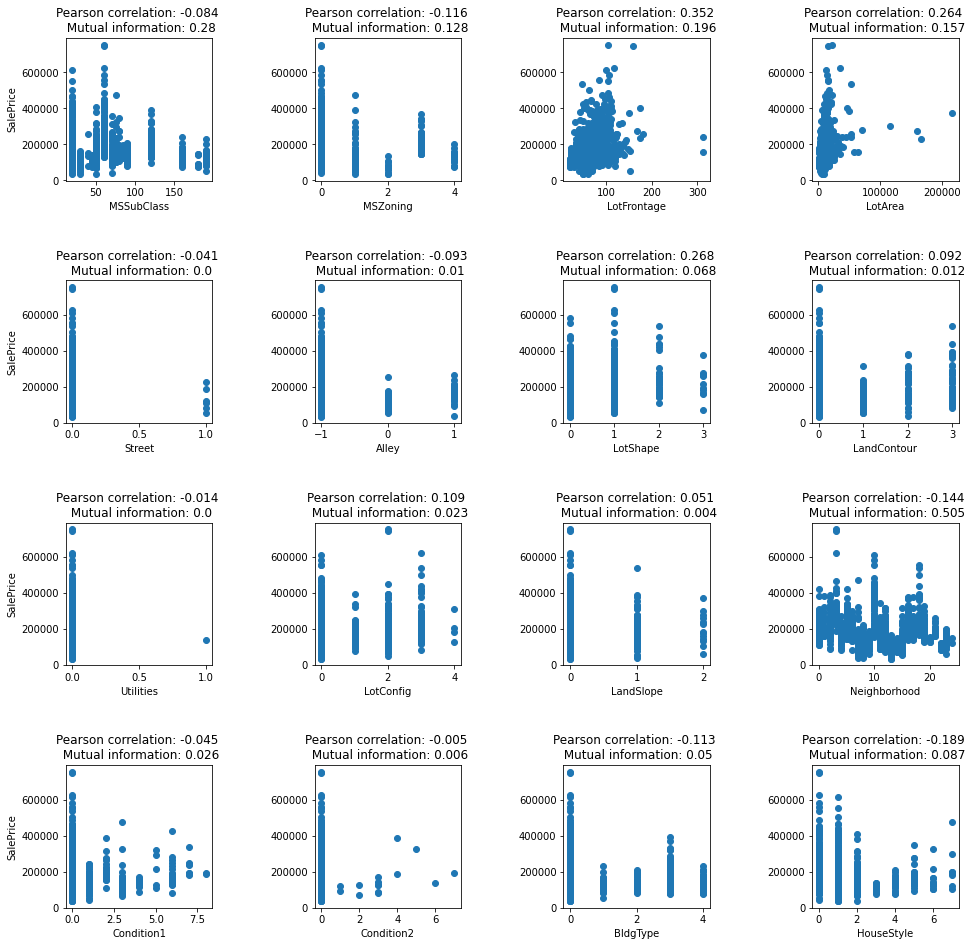

In [58]:
n_numerical_features = 16
n=1
plt.figure(figsize=(16,16))
for col in numerical_columns[:16]:
    plt.subplot(4,4,n)
    plt.scatter(X[col],y)
    plt.xlabel(col)
    if (n-1)%4==0:
        plt.ylabel('SalePrice')
    pearson_coef = coefficients.loc[col]['Pearson correlation coefficient']    
    mutual_info = coefficients.loc[col]['mutual_information']
    plt.title('Pearson correlation: {} \n Mutual information: {}'.format(pearson_coef,mutual_info))
    n=n+1
plt.subplots_adjust(hspace=0.7,wspace=0.7)
plt.savefig('example5.png')
plt.show()

# Example 6: 

## Make a heat map to describe the mutual correlation (pearson correlation coefficient) of the features that had a correlation coefficient with the target price greater than |+-0.3|.

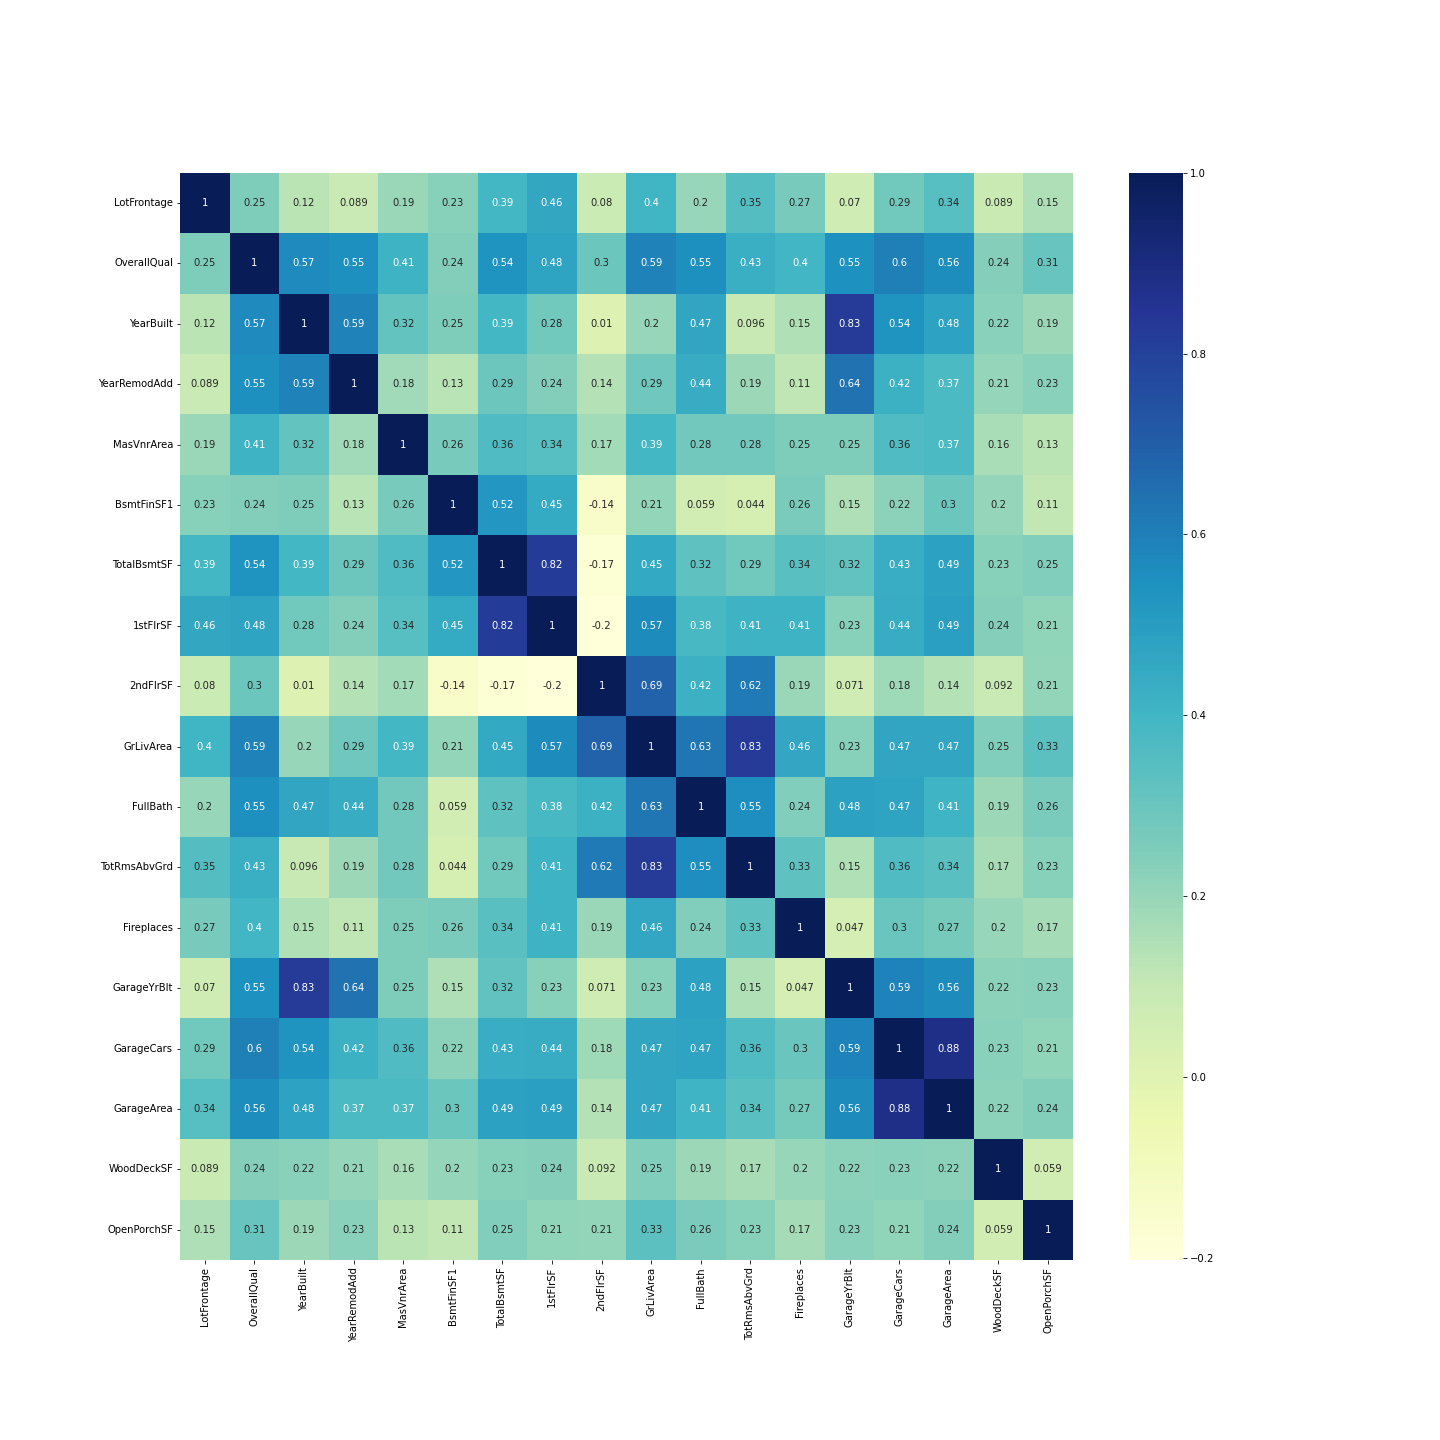

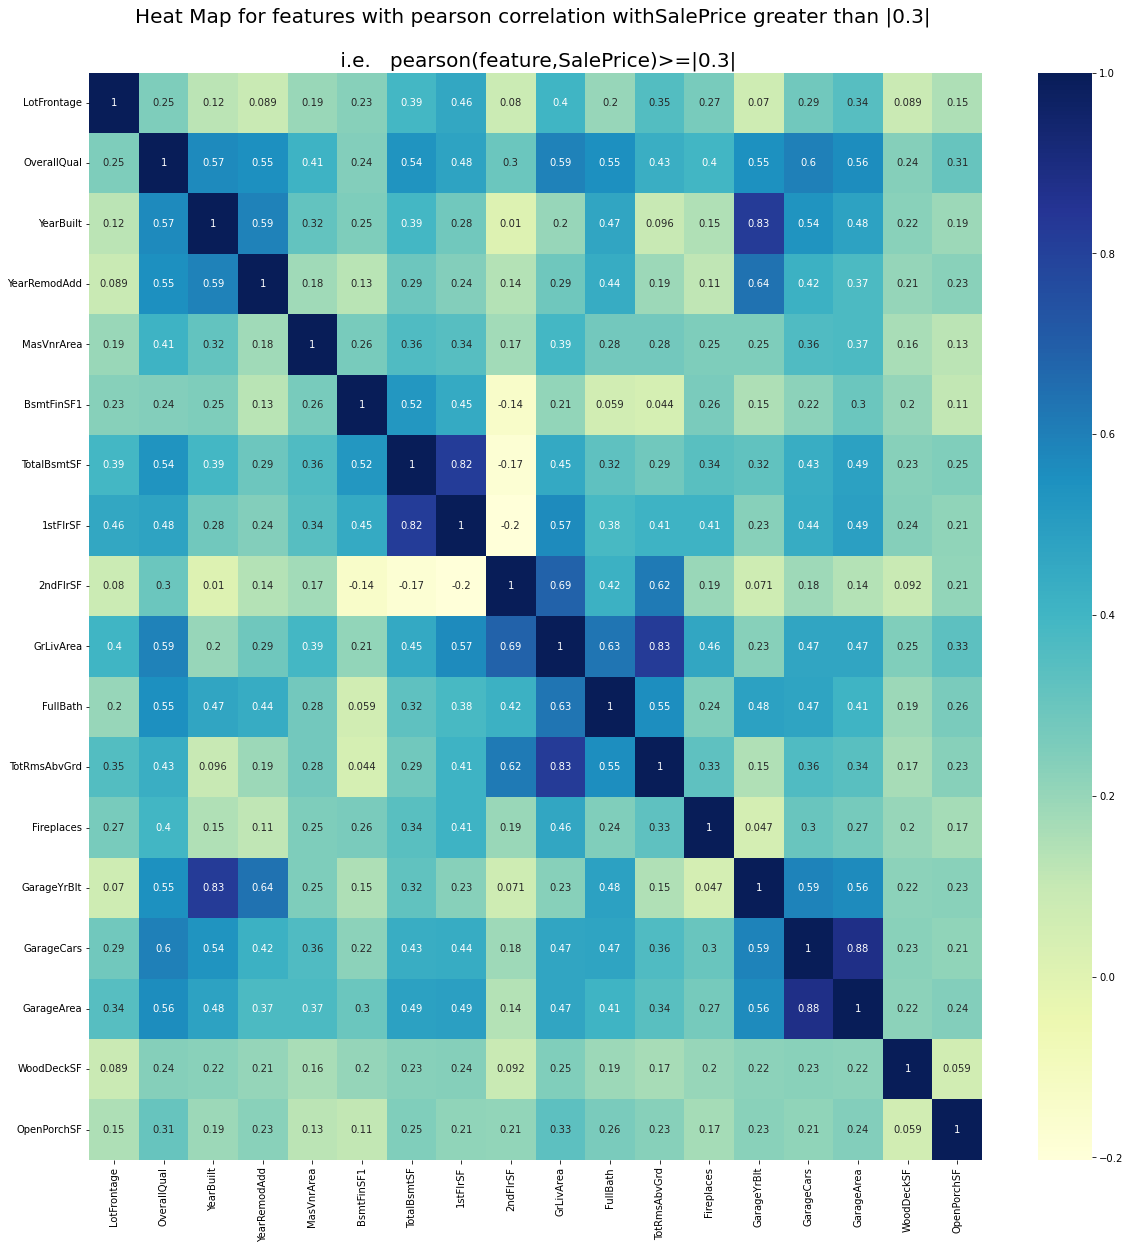

In [68]:
from seaborn import heatmap
import numpy as np
from scipy.stats import pearsonr
numerical_columns = [j for j in X.columns if X[j].dtype in [float,int]]
relevant_numerical = []
for col in numerical_columns:
    _ = pd.concat([X[col],y],axis=1).dropna()
    coef = round(pearsonr(_[col],_['SalePrice'])[0],3)
    if np.abs(coef)>0.3:
        relevant_numerical.append(col)

num_corr = X[relevant_numerical].corr()
plt.figure(figsize=(20,20))
heatmap(num_corr, cmap="YlGnBu", annot=True)
plt.title('Heat Map for features with pearson correlation withSalePrice greater than |0.3| \n\n i.e.   pearson(feature,SalePrice)>=|0.3|',fontsize=20)
plt.savefig('example6.png')
plt.show()

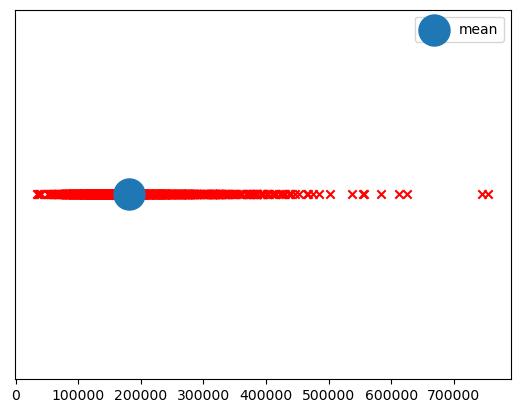

In [11]:
import numpy as np
import matplotlib.pyplot as plt
val = 0. # this is the value where you want the data to appear on the y-axis.
ar = np.arange(10) # just as an example array

plt.scatter(y, np.zeros_like(y) + val,marker='x',c='red')
plt.scatter(y.mean(),0,label='mean',s=500)
#plt.scatter(y.mean()+y.std(),0,label='mean + 1std',marker='^',s=500)
#plt.scatter(y.mean()-y.std(),0,label='mean - 1std',marker='^',s=500)

ax = plt.gca()
ax.axes.yaxis.set_ticks([])
plt.legend()
plt.show()

### Example 7: Line plot the prices

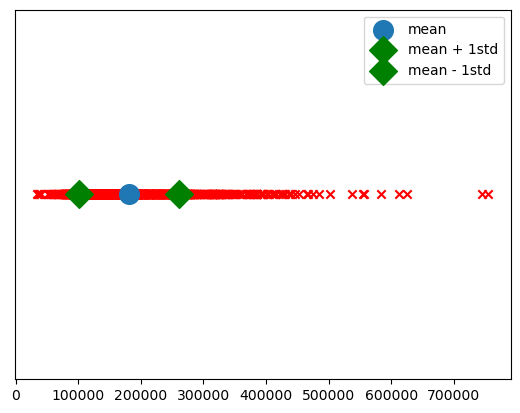

In [12]:
import numpy as np
import matplotlib.pyplot as plt
val = 0. # this is the value where you want the data to appear on the y-axis.
ar = np.arange(10) # just as an example array

plt.scatter(y, np.zeros_like(y) + val,marker='x',c='red')
plt.scatter(y.mean(),0,label='mean',s=200)
plt.scatter(y.mean()+y.std(),0,label='mean + 1std',marker='D',s=200,color='green')
plt.scatter(y.mean()-y.std(),0,label='mean - 1std',marker='D',s=200,color='green')

ax = plt.gca()
ax.axes.yaxis.set_ticks([])
plt.legend()
plt.show()